# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data=pd.read_csv('forestfires (1).csv')

In [4]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# UNDERSTANDING DATA

In [8]:
data1=data.drop(['month','day'],axis=1)

In [9]:
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
data1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [13]:
data1.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [14]:
data1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [15]:
data1.size

14993

# PLOTS

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='area', ylabel='Density'>

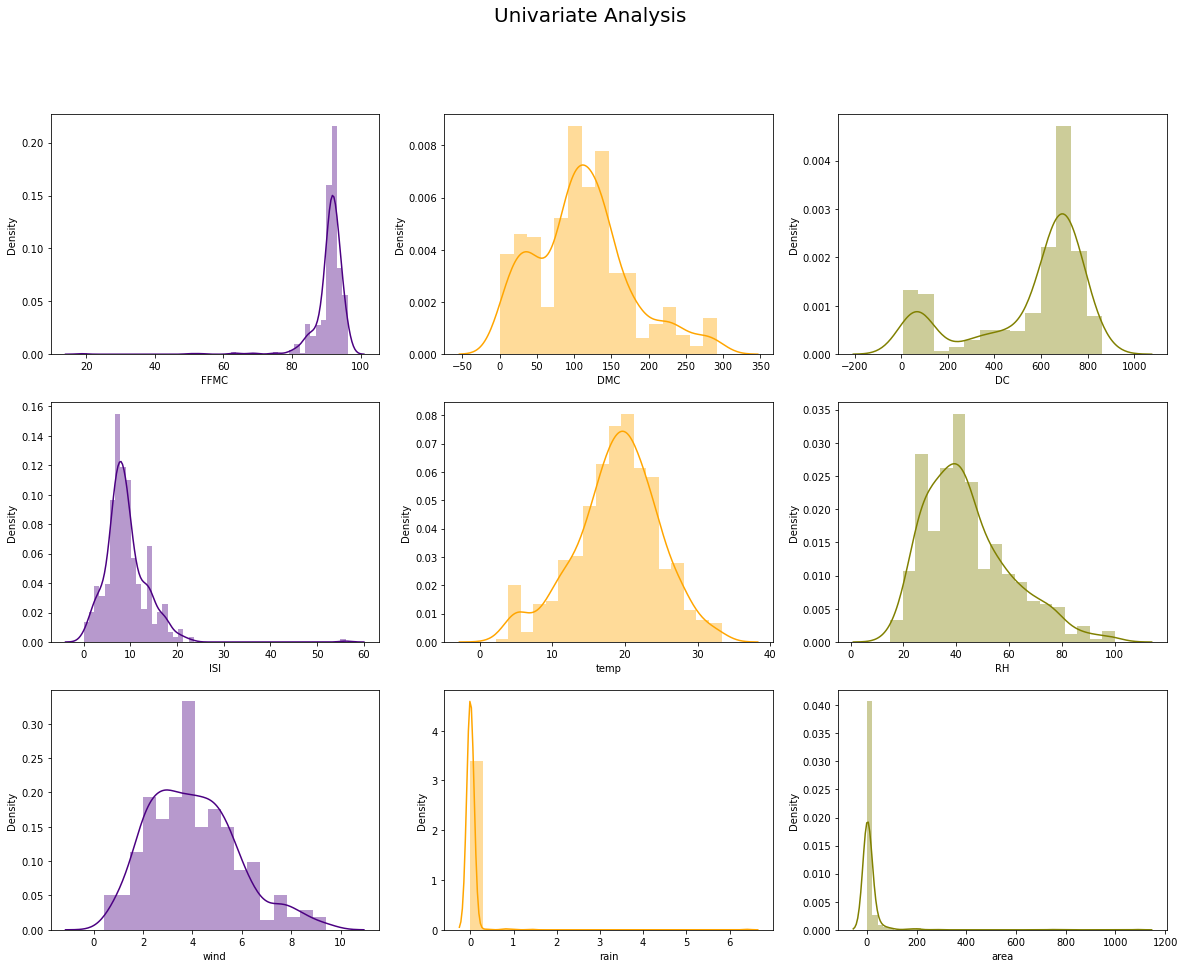

In [17]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['FFMC'],ax=axes[0,0],color='indigo')
sns.distplot(data['DMC'],ax=axes[0,1],color='orange')
sns.distplot(data['DC'],ax=axes[0,2],color='olive')
sns.distplot(data['ISI'],ax=axes[1,0],color='indigo')
sns.distplot(data['temp'],ax=axes[1,1],color='orange')
sns.distplot(data['RH'],ax=axes[1,2],color='olive')
sns.distplot(data['wind'],ax=axes[2,0],color='indigo')
sns.distplot(data['rain'],ax=axes[2,1],color='orange')
sns.distplot(data['area'],ax=axes[2,2],color='olive')

In [18]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
data1.loc[data1["size_category"] == 'small', 'size_category'] = 0
data1.loc[data1["size_category"] == 'large', 'size_category'] = 1

In [21]:
data1.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

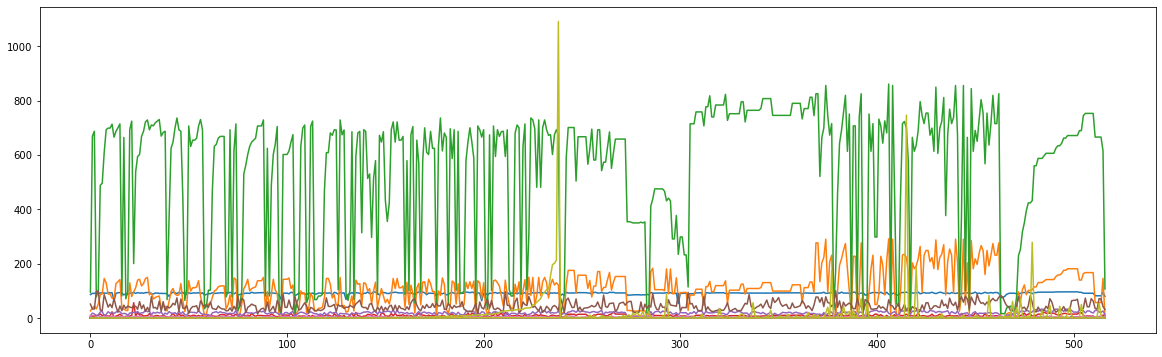

In [22]:
plt.figure(figsize=(20,6))
plt.plot(data1)

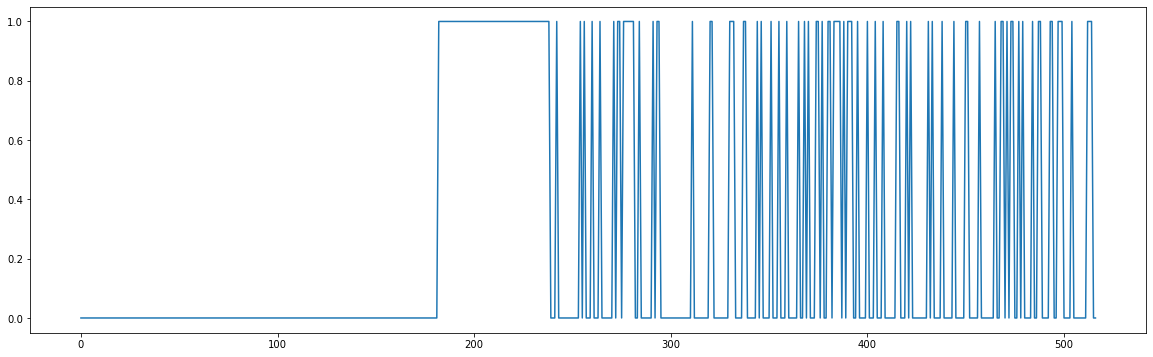

In [23]:
plt.figure(figsize=(20,6))
plt.plot(data1.size_category)

<AxesSubplot:xlabel='size_category', ylabel='Density'>

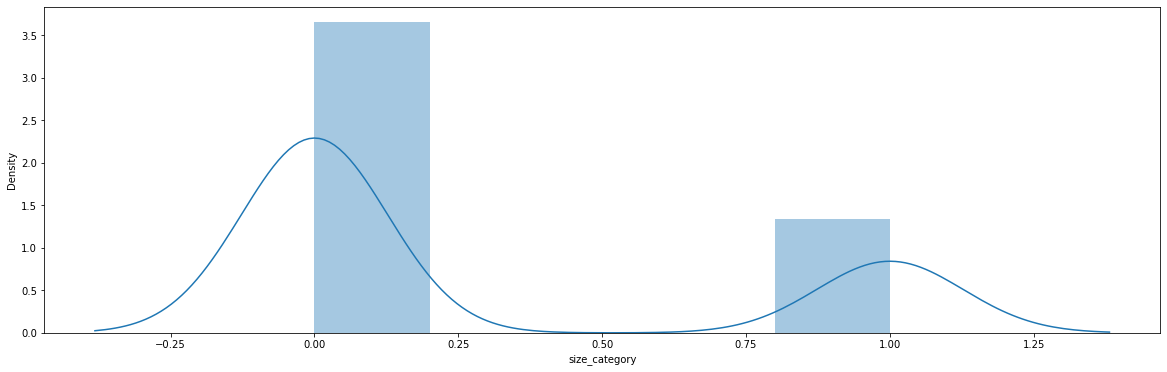

In [24]:
plt.figure(figsize=(20,6))
sns.distplot(data1.size_category)

In [25]:
X = data1.iloc[:,0:27]
Y = data1.iloc[:,27]

In [27]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,1,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,1,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,1,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    0
514    0
515    0
516    0
Name: monthsep, Length: 517, dtype: int64

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
X = data1.iloc[:,:28]
calc_vif(X)

,variables,VIF
0,FFMC,2.279352
1,DMC,3.876881
2,DC,26.504814
3,ISI,1.812856
4,temp,4.515820
5,RH,2.769473
6,wind,1.280596
7,rain,1.088374
8,area,1.041374
9,dayfri,inf


# Train & Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)


In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 28), (361,), (156, 28), (156,))

In [35]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [36]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.6841591591591591)

In [37]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)
pred_test_linear = model_linear.predict(X_test)
np.mean(pred_test_linear==y_test)

1.0

In [38]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_linear.predict(X_test)
np.mean(pred_test_poly==y_test)

1.0

In [39]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_linear.predict(X_test)
np.mean(pred_test_rbf==y_test)

1.0

In [40]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 66.66666666666666


array([[104,   0],
       [ 52,   0]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       104
           1       0.00      0.00      0.00        52

    accuracy                           0.67       156
   macro avg       0.33      0.50      0.40       156
weighted avg       0.44      0.67      0.53       156



# <u>=================================================================